Total O atoms: 8936
Valid H2O molecules (O with 2 H): 8936
Broken or invalid: 0


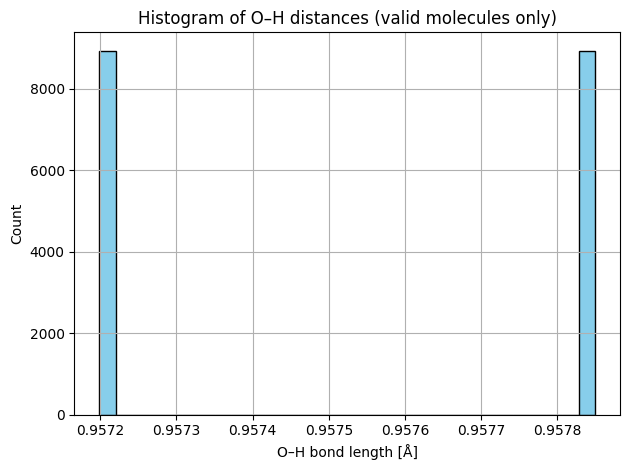

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xyz_file = "/mnt/c/Users/vbarv/Desktop/course/project/lammps/data/water_droplet_packed.xyz"
r_min, r_max = 0.8, 1.2

with open(xyz_file) as f:
    n_atoms = int(f.readline())
    f.readline()
    symbols = []
    coords = []
    for _ in range(n_atoms):
        parts = f.readline().split()
        symbols.append(parts[0])
        coords.append([float(x) for x in parts[1:4]])
coords = np.array(coords)

oxygen_indices = [i for i, s in enumerate(symbols) if s.upper() == "O"]
hydrogen_indices = [i for i, s in enumerate(symbols) if s.upper() == "H"]

valid_molecules = 0
total_oxygens = len(oxygen_indices)
distances_all = []

for oi in oxygen_indices:
    ox = coords[oi]
    close_h = []
    for hi in hydrogen_indices:
        r = np.linalg.norm(coords[hi] - ox)
        if r_min <= r <= r_max:
            close_h.append((hi, r))
    if len(close_h) == 2:
        valid_molecules += 1
        distances_all.extend([r for (_, r) in close_h])

print(f"Total O atoms: {total_oxygens}")
print(f"Valid H2O molecules (O with 2 H): {valid_molecules}")
print(f"Broken or invalid: {total_oxygens - valid_molecules}")

plt.hist(distances_all, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("O–H bond length [Å]")
plt.ylabel("Count")
plt.title("Histogram of O–H distances (valid molecules only)")
plt.grid(True)
plt.tight_layout()
plt.show()
